## 1. Recap

In this mission, we'll dive a bit deeper into matplotlib to learn how to create multiple line charts to help us compare monthly unemployment trends across time. The unemployment dataset contains 2 columns:

- <span style="background-color: #F9EBEA; color:##C0392B">DATE</span>: date, always the first of the month. Examples:
    - 1948-01-01: January 1, 1948.
    - 1948-02-01: February 1, 1948.
    - 1948-03-01: March 1, 1948.
    - 1948-12-01: December 1, 1948.
- <span style="background-color: #F9EBEA; color:##C0392B">VALUE</span>: the corresponding unemployment rate, in percent.

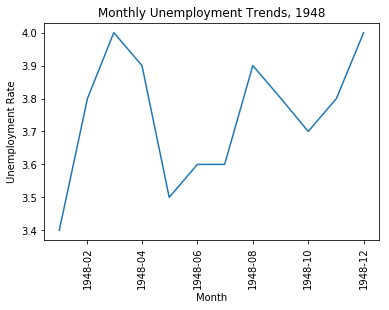

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

unrate = pd.read_csv('unrate.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.title('Monthly Unemployment Trends, 1948')
plt.show()

## 2. Matplotlib Classes

When we were working with a single plot, pyplot was storing and updating the state of that single plot. We could tweak the plot just using the functions in the pyplot module. When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to. This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly. Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:

- a container for all plots was created (returned as a [Figure object](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure))
- a container for the plot was positioned on a grid (the plot returned as an [Axes object](http://matplotlib.org/api/axes_api.html#matplotlib-axes))
- visual symbols were added to the plot (using the Axes methods)

A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

We can manually create a figure by calling [pyplot.figure()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure):

>```python
fig = plt.figure()
```

Instead of only calling the pyplot function, we assigned its return value to a variable (<span style="background-color: #F9EBEA; color:##C0392B">fig</span>). After a figure is created, an axes for a single plot containing no data is created within the context of the figure. When rendered without data, the plot will resemble the empty plot from the previous mission. The Axes object acts as its own container for the various components of the plot, such as:

- values on the x-axis and y-axis
- ticks on the x-axis and y-axis
- all visual symbols, such as:
- markers
- lines
- gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use [Figure.add_subplot](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot). This will return a new Axes object, which needs to be assigned to a variable:

>```python
axes_obj = fig.add_subplot(nrows, ncols, plot_number)
```

If we want the figure to contain 2 plots, one above the other, we need to write:

>```python
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
```

This will create a grid, 2 rows by 1 column, of plots. Once we're done adding subplots to the figure, we display everything using <span style="background-color: #F9EBEA; color:##C0392B">plt.show()</span>:

>```python
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()
```

Let's create a figure, add subplots to it, and display it.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Use <span style="background-color: #F9EBEA; color:##C0392B">plt.figure()</span> to create a figure and assign to <span style="background-color: #F9EBEA; color:##C0392B">fig</span>.
2. Use <span style="background-color: #F9EBEA; color:##C0392B">Figure.add_subplot()</span> to create two subplots above and below each other
3. Assign the top Axes object to <span style="background-color: #F9EBEA; color:##C0392B">ax1</span>.
4. Assign the bottom Axes object to <span style="background-color: #F9EBEA; color:##C0392B">ax2</span>.
5. Use <span style="background-color: #F9EBEA; color:##C0392B">plt.show()</span> to display the resulting plot.




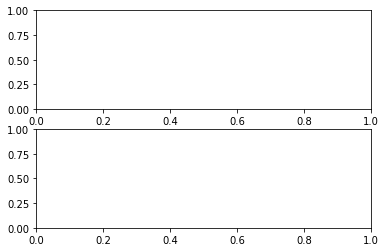

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
plt.show()

## 3. Grid positioning

For each subplot, matplotlib generated a coordinate grid that was similar to the one we generated in the last mission using the <span style="background-color: #F9EBEA; color:##C0392B">plot()</span> function:

- the x-axis and y-axis values ranging from **0.0** to **1.0**
- no gridlines
- no data

The main difference is that this plot ranged from **0.0** to **1.0** instead of from **-0.06** to **0.06**, which is a quirk suggested by a difference in default properties.

Now that we have a basic understanding of the important matplotlib classes, we can create multiple plots to compare monthly unemployment trends. If you recall, we need to specify the position of each subplot on a grid. Here's a diagram that demonstrates how a 2 by 2 subplot layout would look like:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0QVVYZUpMSkxlVEU">


When the first subplot is created, matplotlib knows to create a grid with 2 rows and 2 columns. As we add each subplot, we specify the plot number we want returned and the corresponding Axes object is created and returned. In matplotlib, the plot number starts at the top left position in the grid (left-most plot on the top row), moves through the remaining positions in that row, then jumps to the left-most plot in the second row, and so forth.

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0QmtiRWtOQ3JmVFE">

If we created a grid of 4 subplots but don't create a subplot for each position in the grid, areas without axes are left blank:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0YmNxX2l1dVNfcFU">

## 4. Adding data

To generate a line chart within an Axes object, we need to call [Axes.plot()](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.plot) and pass in the data you want plotted:

>```python
x_values = [0.0, 0.5, 1.0]
y_values = [10, 20, 40]
ax1.plot(x_values, y_values)
```

Like <span style="background-color: #F9EBEA; color:##C0392B">pyplot.plot()</span>, the <span style="background-color: #F9EBEA; color:##C0392B">Axes.plot()</span> will accept any iterable object for these parameters, including NumPy arrays and pandas Series objects. It will also use generate a line chart by default from the values passed in. Each time we want to generate a line chart, we need to call <span style="background-color: #F9EBEA; color:##C0392B">Axes.plot()</span> and pass in the data we want to use in that plot.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Create 2 line subplots in a 2 row by 1 column layout:
    - In the top subplot, plot the data from 1948.
        - For the x-axis, use the first 12 values in the <span style="background-color: #F9EBEA; color:##C0392B">DATE</span> column.
        - For the y-axis, use the first 12 values in the <span style="background-color: #F9EBEA; color:##C0392B">VALUE</span> column.
    - In the bottom subplot, plot the data from 1949.
        - For the x-axis, use the values from index 12 to 24 in the <span style="background-color: #F9EBEA; color:##C0392B">DATE</span> column.
        - For the y-axis, use the values from index 12 to 24 in the <span style="background-color: #F9EBEA; color:##C0392B">VALUE</span> column.
2. Use <span style="background-color: #F9EBEA; color:##C0392B">plt.show()</span> to display all the plots.



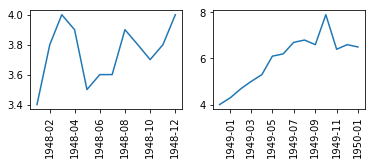

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

leitor = pd.read_csv("unrate.csv")
leitor["DATE"] = pd.to_datetime(leitor["DATE"])

x = leitor["DATE"].head(12)
y = leitor["VALUE"].head(12)

x1 = leitor["DATE"].loc[11:24]
y1 = leitor["VALUE"].loc[11:24]

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
plt.xticks(rotation = 90)

ax2 = fig.add_subplot(2, 2, 2)
plt.xticks(rotation = 90)

ax1.plot(x, y)
ax2.plot(x1, y1)

plt.show()

## 5. Formating and spacing

One issue with the 2 plots is that the x-axis ticks labels are unreadable. The other issue is that the plots are squeezed together vertically and hard to interpret. Even though now we generated 2 line charts, the total plotting area for the figure remained the same:

<img width="800" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0MzZEZ21VTGQyak0">


This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots. If we want to expand the plotting area, we have to specify this ourselves when we create the figure. To tweak the dimensions of the plotting area, we need to use the <span style="background-color: #F9EBEA; color:##C0392B">figsize</span> parameter when we call <span style="background-color: #F9EBEA; color:##C0392B">plt.figure()</span>:

This parameter takes in a tuple of floats:

>```python
fig = plt.figure(figsize=(width, height))
```

The unit for both width and height values is inches. The <span style="background-color: #F9EBEA; color:##C0392B">dpi</span> parameter, or dots per inch, and the <span style="background-color: #F9EBEA; color:##C0392B">figsize</span> parameter determine how much space on your display a plot takes up. By increasing the width and the height of the plotting area, we can address both issues.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. For the plot we generated in the last screen, set the width of the plotting area to **12** inches and the height to **6** inches.


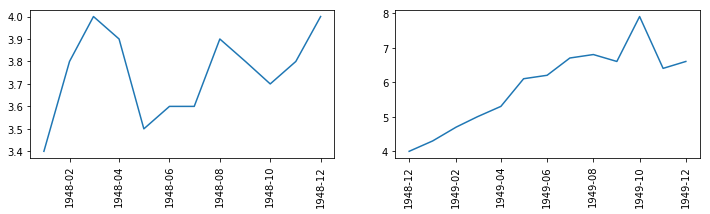

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

leitor_1 = pd.read_csv("unrate.csv")
leitor_1["DATE"] = pd.to_datetime(leitor_1["DATE"])

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(2, 2, 1)
plt.xticks(rotation = 90)
ax2 = fig.add_subplot(2, 2, 2)
plt.xticks(rotation = 90)

x = leitor_1["DATE"].head(12)
y = leitor_1["VALUE"].head(12)

x1 =leitor_1["DATE"].loc[11:23]
y1 = leitor_1["VALUE"].loc[11:23]

ax1.plot(x, y)
ax2.plot(x1, y1)

plt.show()

## 6. Comparing across more years

Instead of having to rotate the x-axis tick labels, we were able to horizontally extend the entire plotting area to make the labels more readable. Because the goal is to be able to look for any visual similarities between the lines in the plots, we want the space between the 2 plots to be as small as possible. If we had rotated the labels by 90 degrees instead, like we did in the last mission, we'd need to increase the spacing between the plots to keep them from overlapping. Expanding the plotting area horizontally improved the readability of the x-axis tick labels and minimized the amount of space between the 2 line charts.

If you recall, we generated these 2 line charts because we were interested in looking for any seasonality in the monthly unemployment trends. If you spend some time visually analyzing both line charts, you'll discover that there's no changes in unemployment trends that are occurring in the same month in both years.

Let's visualize data from a few more years to see if we find any evidence for seasonality between those years.


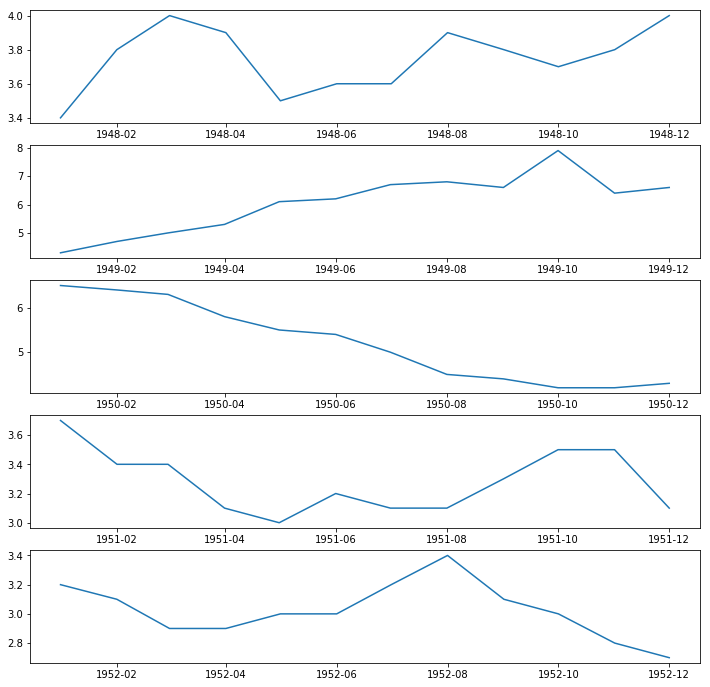

In [12]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

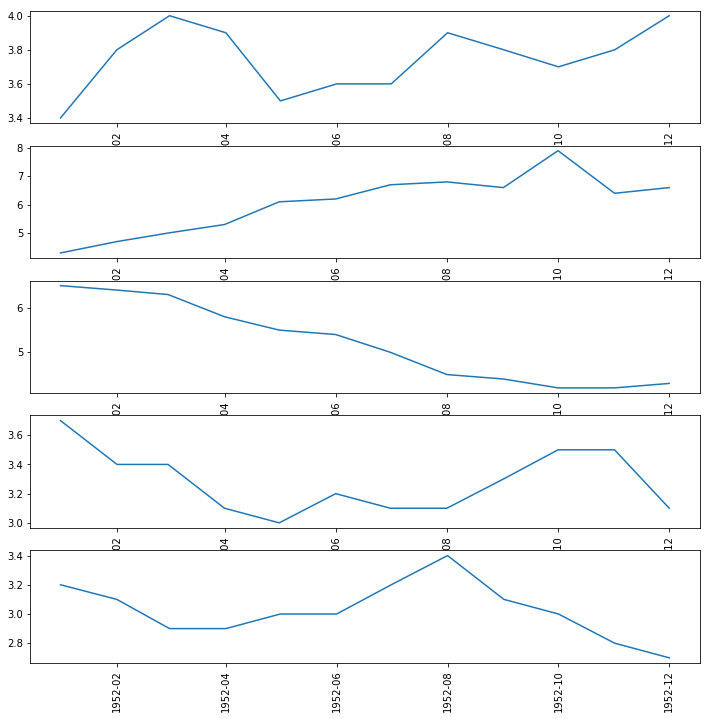

In [17]:
fig = plt.figure(figsize = (12, 12))

for i in range(5):
    ax = fig.add_subplot(5, 1, i+1)
    inicio = i * 12
    fim = (i + 1) * 12
    salva = leitor_1[inicio:fim]
    ax.plot(salva["DATE"], salva["VALUE"])
    plt.xticks(rotation = 90)

plt.show()

## 7. Overlaying line charts

By adding more line charts, we can look across more years for seasonal trends. This comes at a cost, unfortunately. We now have to visually scan over more space, which is a limitation that we experienced when scanning the table representation of the same data. If you recall, one of the limitations of the table representation we discussed in the previous mission was the amount of time we'd have to spend scanning the table as the number of rows increased significantly.

We can handle the visual overhead each additional plot adds by overlaying the line charts in a single subplot. If we remove the year from the x-axis and just keep the month values, we can use the same x-axis values to plot all of the lines. First, we'll explore how to extract just the month values from the <span style="background-color: #F9EBEA; color:##C0392B">DATE</span> column, then we'll dive into generating multiple plots on the same coordinate grid.

To extract the month values from the <span style="background-color: #F9EBEA; color:##C0392B">DATE</span> column and assign them to a new column, we can use the [pandas.Series.dt](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dt-accessors) accessor:

>```python
unrate['MONTH'] = unrate['DATE'].dt.month
```

Calling <span style="background-color: #F9EBEA; color:##C0392B">pandas.Series.dt.month</span> returns a Series containing the integer values for each month (e.g. **1** for January, **2** for February, etc.). Under the hood, pandas applies the datetime.date function over each datetime value in the <span style="background-color: #F9EBEA; color:##C0392B">DATE</span> column, which returns the integer month value. Let's now move onto generating multiple line charts in the same subplot.

In the last mission, we called <span style="background-color: #F9EBEA; color:##C0392B">pyplot.plot()</span> to generate a single line chart. Under the hood, matplotlib created a figure and a single subplot for this line chart. If we call <span style="background-color: #F9EBEA; color:##C0392B">pyplot.plot()</span> multiple times, matplotlib will generate the line charts on the single subplot.

>```python
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```

If we want to set the dimensions for the plotting area, we can create the figure ourselves first then plot the data. This is because matplotlib first checks if a figure already exists before plotting data. It will only create one if we didn't create a figure.

>```python
fig = plt.figure(figsize=(6,6))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'])
```

By default, matplotlib will select a different color for each line. To specify the color ourselves, use the <span style="background-color: #F9EBEA; color:##C0392B">c</span> parameter when calling <span style="background-color: #F9EBEA; color:##C0392B">plot()</span>:

>```python
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
```

You can read about the different ways we can specify colors in matplotlib [here](http://matplotlib.org/api/colors_api.html).


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Set the plotting area to a width of **6** inches and a height of **3** inches.
2. Generate 2 line charts in the baseplot, using the **MONTH** column for the x-axis instead of the **DATE** column:
    - One line chart using data from 1948, with the line color set to "red".
    - One line chart using data from 1949, with the line color set to "blue".
3. Use **plt.show()** to display the plots.

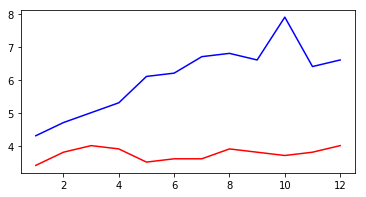

In [19]:
import matplotlib.pyplot as plt 
import pandas as pd

leitor["MES"] = leitor["DATE"].dt.month

fig = plt.figure(figsize = (6, 3))

aux = leitor[0:12]
aux2 = leitor[12:24]

plt.plot(aux["MES"], aux["VALUE"], c = "red")
plt.plot(aux2["MES"], aux2["VALUE"], c = "blue")

plt.show()

## 8. Adding more lines

Let's visualize 5 years worth of unemployment rates on the same subplot.

<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Set the plotting area to a width of **10** inches and a height of **6** inches.
2. Generate the following plots in the base subplot:
    - 1948: set the line color to "red"
    - 1949: set the line color to "blue"
    - 1950: set the line color to "green"
    - 1951: set the line color to "orange"
    - 1952: set the line color to "black"
3. Use **plt.show()** to display the plots.

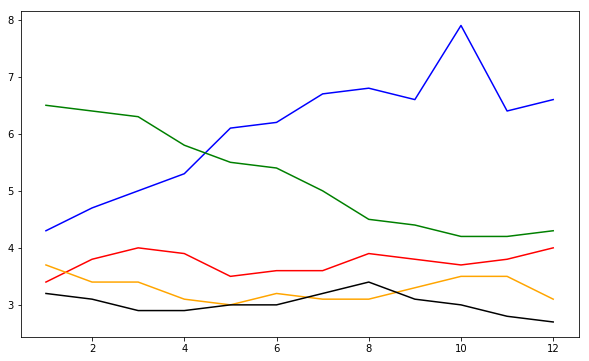

In [25]:
fig = plt.figure(figsize = (10, 6))

for i in range(5):
    if i == 0:
        color = "red"
    elif i == 1:
        color = "blue"
    elif i == 2:
        color = "green"
    elif i == 3:
        color = "orange"
    elif i== 4:
        color = "black"
    
    inicio = i * 12
    fim = (i + 1) * 12
    aux = leitor[inicio: fim]
    
    plt.plot(aux["MES"], aux["VALUE"], c = color)
    
plt.show()

## 9. Adding a legend

How colorful! By plotting all of the lines in one coordinate grid, we got a different perspective on the data. The main thing that sticks out is how the blue and green lines span a larger range of y values (4% to 8% for blue and 4% to 7% for green) while the 3 plots below them mostly range only between 3% and 4%. You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.

To help remind us which year each line corresponds to, we can add a **legend** that links each color to the year the line is representing. Here's what a legend for the lines in the last screen could look like:

<img width="200" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=0BxhVm1REqwr0VlRkLWo4d000MGs">


When we generate each line chart, we need to specify the text label we want each color linked to. The <span style="background-color: #F9EBEA; color:##C0392B">pyplot.plot()</span> function contains a <span style="background-color: #F9EBEA; color:##C0392B">label</span> parameter, which we use to set the year value:

>```python
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red', label='1948')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue', label='1949')
```

We can create the legend using [pyplot.legend](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) and specify its location using the loc parameter:

>```python
plt.legend(loc='upper left')
```

If we're instead working with multiple subplots, we can create a legend for each subplot by mirroring the steps for each subplot. When we use <span style="background-color: #F9EBEA; color:##C0392B">plt.plot()</span> and <span style="background-color: #F9EBEA; color:##C0392B">plt.legend()</span>, the <span style="background-color: #F9EBEA; color:##C0392B">Axes.plot()</span> and <span style="background-color: #F9EBEA; color:##C0392B">Axes.legend()</span> methods are called under the hood and parameters passed to the calls. When we need to create a legend for each subplot, we can use <span style="background-color: #F9EBEA; color:##C0392B">Axes.legend()</span> instead.

Let's now add a legend for the plot we generated in the last screen.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Modify the code from the last screen that overlaid 5 plots to include a legend. Use the year value for each line chart as the label.
    - E.g. the plot of 1948 data that uses "red" for the line color should be labeled "1948" in the legend.
2. Place the legend in the "upper left" corner of the plot.
3. Display the plot using **plt.show()**.

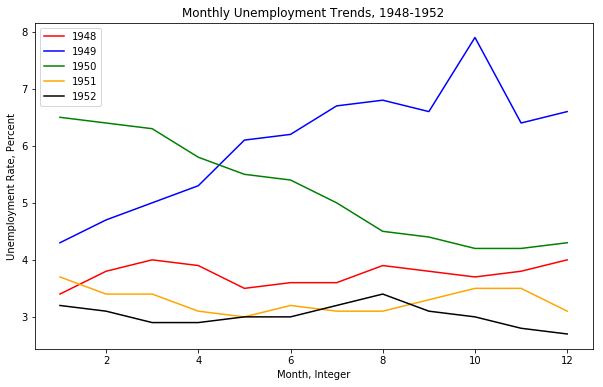

In [31]:
fig = plt.figure(figsize=(10, 6))
color = ["red", "blue", "green", "orange", "black"]

for i in range(5):
    inicio = i * 12
    fim = (i + 1) * 12
    aux = leitor[inicio:fim]
    label = str(1948 + i)
    plt.plot(aux["MES"], aux["VALUE"], c = color[i], label = label)

plt.legend(loc = "upper left")
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")

plt.show()
    

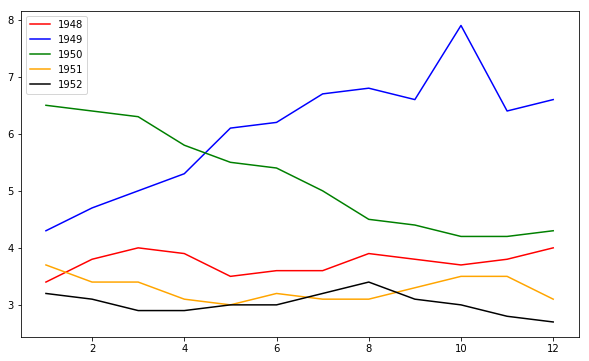

In [41]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')

plt.show()

## 10. Final tweaks

Instead of referring back to the code each time we want to confirm what subset each line corresponds to, we can focus our gaze on the plotting area and use the legend. At the moment, the legend unfortunately covers part of the green line (which represents data from 1950). Since the legend isn't critical to the plot, we should move this outside of the coordinate grid. We'll explore how to do so in a later course because it requires a better understanding of some design principles as well as matplotlib.

Before we wrap up this mission, let's enhance the visualization by adding a title and labels for both axes. To set the title, we use [pyplot.title()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.title) and pass in a string value:

>```python
plt.title("Monthly Unemployment Trends, 1948-1952")
```

To set the x-axis and y-axis labels, we use <span style="background-color: #F9EBEA; color:##C0392B">pyplot.xlabel()</span> and <span style="background-color: #F9EBEA; color:##C0392B">pyplot.ylabel()</span>. Both of these methods accept string values.


<br>
<div class="alert alert-info">
<b>Exercise Start.</b>
</div>

**Description**:

1. Modify the code from the last screen:
    - Set the title to <span style="background-color: #F9EBEA; color:##C0392B">"Monthly Unemployment Trends, 1948-1952"</span>.
    - Set the x-axis label to <span style="background-color: #F9EBEA; color:##C0392B">"Month, Integer"</span>.
    - Set the y-axis label to <span style="background-color: #F9EBEA; color:##C0392B">"Unemployment Rate, Percent"</span>.